# Boundless GAN

### Setup

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from io import BytesIO
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from six.moves.urllib.request import urlopen

### Loading input image

In [3]:
def read_image(filename):
    fd = None

    # url image
    if filename.startswith('http'):
        fd = urlopen(filename)
    else:
        fd = tf.io.gfile.GFile(filename, 'rb')

    image = Image.open(fd)
    width, height = image.size
    # crop to make the image square
    image = image.crop((0, 0, height, height))
    image = image.resize((257, 257), Image.ANTIALIAS)
    image_unscaled = np.array(image)
    image_np = np.expand_dims(image_unscaled.astype(np.float32) / 255., axis=0)

    return image_np

### Visualize method

In [15]:
def visualize_output_comparison(img_original, img_maked, img_filled):
    plt.figure(figsize=(24, 12))
    plt.subplot(131)
    plt.imshow((np.squeeze(img_original)))
    plt.title("Original", fontsize=24)
    plt.axis('off')
    plt.subplot(132)
    plt.imshow((np.squeeze(img_maked)))
    plt.title("Masked", fontsize=24)
    plt.axis('off')
    plt.subplot(133)
    plt.imshow((np.squeeze(img_filled)))
    plt.title("Generated", fontsize=24)
    plt.axis('off')
    plt.show()

### Loading image

You can use original images

In [22]:
media = "https://lh3.googleusercontent.com/vDwAH2WG0qYG1cmr__2QZiaFoq0vGf4mW6Kv-gMWk-nRju_7VDI_9uq2yvSXHyjtznLD2SJ7q_oLjDP4VWmqEe9cNydF6rNndnB_9qRNGqbFLMEtGOKCGqD4yZ-OBjQPLnHPZfOcby7KOIKQHienkmMdPAFRb6rQg_60_RJZgjKaA3B3wBR8SY8RA8o7ADlojqLyslbTOJgndiTLU04VOzrQXCkYu0Xue_wbFFzI9Th7EjjSxf6IhAHvtjQQROW3ne4DC4jatiwbkGauSXddlmsCfjuxe7-F9WtkvUMvbTSSXud4HD-yz8KAQFKzyehbRay2EQTRAMCDEDuui-VxJKShoFssl5BWv55kcJH9W1IwAvh7A_qOj7yUMWueqwAPCAIoL-NrTsKliaa6dd5qxkSWSE2r6f7E5xlZSH-VgZ-HnnXBjqSvT8rqy1fz-oH14lo8us_228N_N23QZwqGaLfIb8kR50wItzWG_FaCaYt4coWdSfWuSzMayKNmgsezIp_NN-jKwjnfX5TrmX8G7iEF0013cbNhQSIT9x1uhY3mHKNhjRr6FmNkcNGnzc1SYFj7xcCk6rlIB88pdnyePOgdiiVAz3ZmSHXZ4mEP3-O5zWbjwBSDYx3yMpgXeGc6PK1EJhs2h0LQ_K1aqlicMMooyoaANlzgmy_A4QUwP78w-8NJxJl3yoPKVHcBeU7WIsaH8hp_NJyQQp7f5y7G4dYA9t5hv6dKoFakbUC5SfLCvM2ndPiIPe9dWoS_6Q=w1272-h954-no?authuser=0"

input_img = read_image(media)

### Select model fron tensorflow hub

Reference
- Boundless half: 1/2 of image size
- Boundless quarter: 1/4 of image size
- Boundless three quarters: 3/4 of image size

In [18]:
model_name = 'Boundless Half'
model_handle_map = {
    'Boundless Half': "https://tfhub.dev/google/boundless/half/1",
    'Boundless Quarter': "https://tfhub.dev/google/boundless/quarter/1",
    'Boundless Three Quarters': "https://tfhub.dev/google/boundless/three_quarter/1"
}

model_handle = model_handle_map[model_name]
print(f"Loading model {model_name} ({model_handle})")
model = hub.load(model_handle)

Loading model Boundless Half (https://tfhub.dev/google/boundless/half/1)


### Start prediction

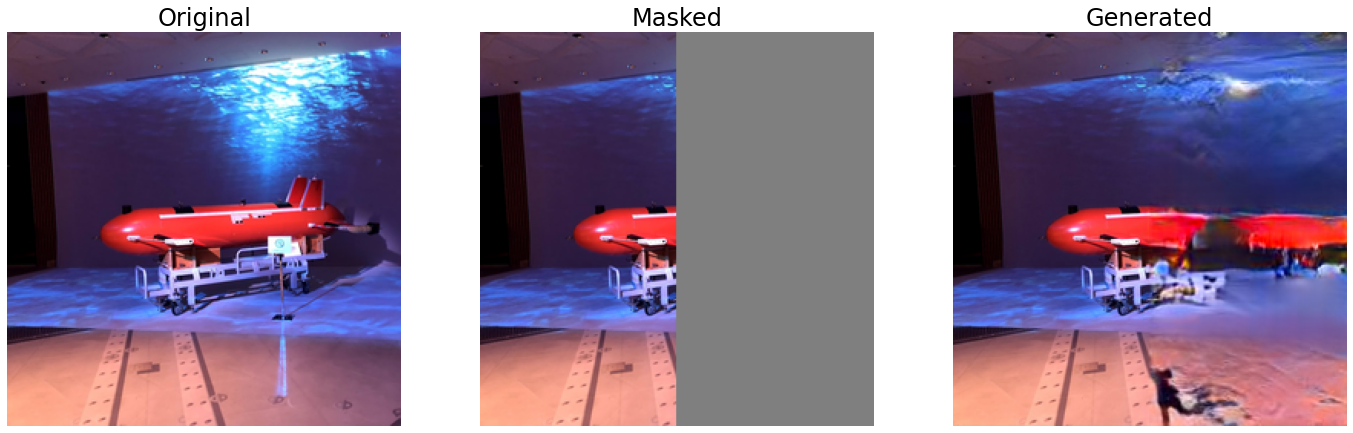

In [23]:
# return mask numpy array, geneared image numpy array
result = model.signatures['default'](tf.constant(input_img))
generated_image = result['default']
masked_image = result['masked_image']

visualize_output_comparison(input_img, masked_image, generated_image)